ANALYSE D'UN DATASET DE PRIX D'ACTIONS

Statistiques descriptives :
Moyenne: 100.6
Médiane: 100.94
Variance: 101.58
Écart-type: 10.08
Min: 74.47
Max: 122.7

Analyse financière supplémentaire :
Volatilité journalière : 14.28%
Rendement total : -11.58%


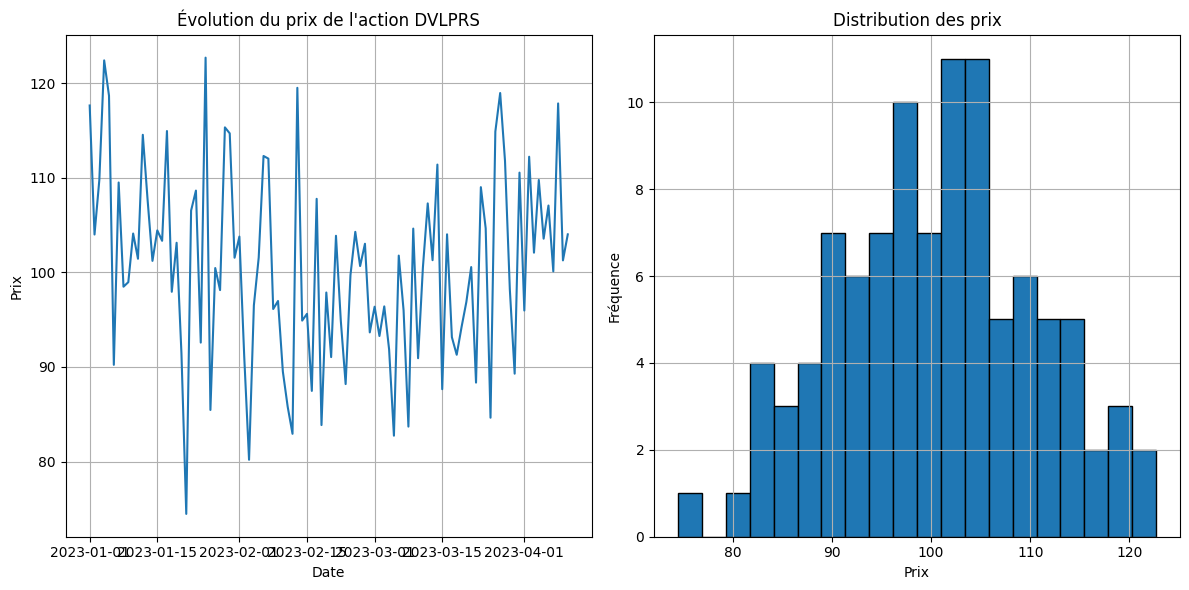


Interprétation des résultats :
1. Prix moyen et dispersion :
- Le prix moyen de 100.6€ avec un écart-type de 10.08€
- Les prix varient entre 74.47€ et 122.7€

2. Volatilité :
- La volatilité journalière de 14.28% indique le niveau de risque
- Cette mesure est importante pour les investisseurs dans leur évaluation du risque

3. Distribution :
- Asymétrie (skewness) : 0.01
- Kurtosis : -0.38


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

print("ANALYSE D'UN DATASET DE PRIX D'ACTIONS")

# 1. Création du dataset
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=100)
prices = np.random.normal(loc=100, scale=10, size=len(dates))
stock_data = pd.DataFrame({
    'Date': dates,
    'DVLPRS_Price': prices
})

# 2. Conversion en array NumPy et calculs statistiques
prix_array = stock_data['DVLPRS_Price'].to_numpy()

# 3. Calcul des statistiques
stats_dict = {
    'Moyenne': np.mean(prix_array).round(2),
    'Médiane': np.median(prix_array).round(2),
    'Variance': np.var(prix_array).round(2),
    'Écart-type': np.std(prix_array).round(2),
    'Min': np.min(prix_array).round(2),
    'Max': np.max(prix_array).round(2)
}

# Affichage des résultats
print("\nStatistiques descriptives :")
for key, value in stats_dict.items():
    print(f"{key}: {value}")

# 4. Analyse supplémentaire pour contexte financier
rendements_journaliers = np.diff(prix_array) / prix_array[:-1] * 100
volatilite = np.std(rendements_journaliers).round(2)

print("\nAnalyse financière supplémentaire :")
print(f"Volatilité journalière : {volatilite}%")
print(f"Rendement total : {((prix_array[-1]/prix_array[0] - 1) * 100).round(2)}%")

# Visualisation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(dates, prix_array)
plt.title('Évolution du prix de l\'action DVLPRS')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(prix_array, bins=20, edgecolor='black')
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.grid(True)

plt.tight_layout()
plt.show()

# Interprétation des résultats
print("\nInterprétation des résultats :")
print("1. Prix moyen et dispersion :")
print(f"- Le prix moyen de {stats_dict['Moyenne']}€ avec un écart-type de {stats_dict['Écart-type']}€")
print(f"- Les prix varient entre {stats_dict['Min']}€ et {stats_dict['Max']}€")

print("\n2. Volatilité :")
print(f"- La volatilité journalière de {volatilite}% indique le niveau de risque")
print("- Cette mesure est importante pour les investisseurs dans leur évaluation du risque")

print("\n3. Distribution :")
skewness = stats.skew(prix_array)
kurtosis = stats.kurtosis(prix_array)
print(f"- Asymétrie (skewness) : {skewness:.2f}")
print(f"- Kurtosis : {kurtosis:.2f}")
